In [310]:
from pykat import finesse        
from pykat.commands import *    
import numpy as np               
import matplotlib.pyplot as plt  

base = finesse.kat()
base.verbose = False


Mich= """

l laser 10 0  n11

#modulator
s m0d_cav_l 1  n11 n10
mod mod1 98.7M 0.3 1 pm  n10 n9
s mod_r 2  n9 n8

#power recycling
m1 PRM 1 0 0 n8 n7
s PRC 1  n7 n6

bs bs1 0.5 0.5 45 0 n6 n3 n4 n5

#cavities
s x_arm 3k  n4 n2
s y_arm 3k  n3 n1

#ETMs
m1 y_etm 0.03 0 0 n1 dump
m1 x_etm 0.03 0 0 n2 dump

#detectors
pd0 main_out n5

ad mod_upper 98.7M  n8
ad mod_lower -98.7M  n8

pd0 xarm n1*

"""

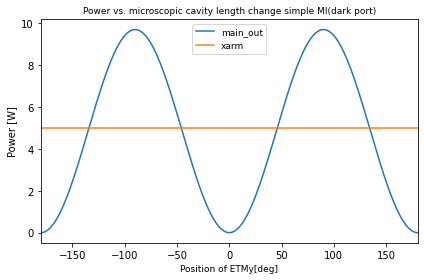

In [311]:
base.parse(Mich)
kat = base.deepcopy()
kat.parse(""" xaxis y_etm phi lin -180 180 800""")
out1=kat.run()
out1.plot(['xarm','main_out'],xlabel='Position of ETMy[deg]',ylabel='Power [W]',title = 'Power vs. microscopic cavity length change simple MI(dark port)')

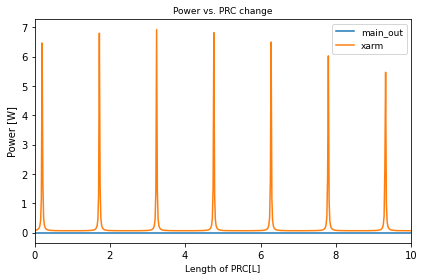

6.91868486772781


In [314]:
kat = base.deepcopy()

base.PRM.T=0.05
base.PRC.s=1
base.PRM.phi=0

kat.parse(""" xaxis PRC L lin 0 10 500""")
out1=kat.run()
out1.plot(['main_out','xarm'],xlabel='Length of PRC[L]',ylabel='Power [W]',title = 'Power vs. PRC change')
print(max(out1['xarm']))

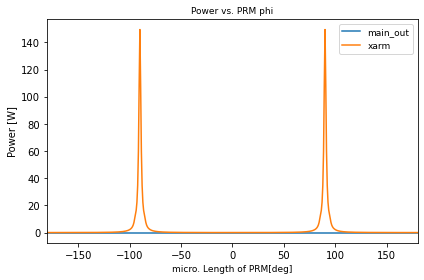

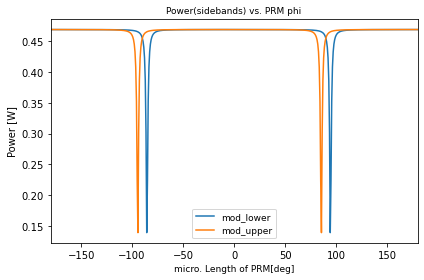

In [315]:
kat1 = kat.deepcopy()
kat1.PRC.s=3.24
kat1.PRM.phi=0
kat1.parse(""" xaxis PRM phi lin -180 180 500""")
out2=kat1.run()
out2.plot(['main_out','xarm'],xlabel='micro. Length of PRM[deg]',ylabel='Power [W]',title = 'Power vs. PRM phi')
out2.plot(['mod_upper','mod_lower'],xlabel='micro. Length of PRM[deg]',ylabel='Power [W]',title = 'Power(sidebands) vs. PRM phi')

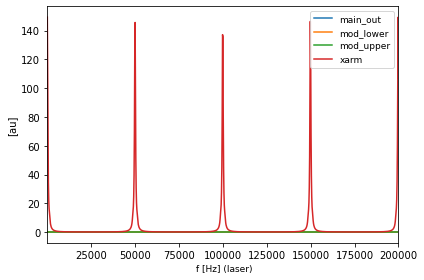

In [330]:
kat2 = kat1.deepcopy()
kat2.PRC.s=3.24
kat2.PRM.phi=90
kat2.parse(""" xaxis laser f lin 1 200k 1000 """)
out3=kat2.run()
out3.plot()